In [1]:
#library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K
import time
import os
import matplotlib.image as img
import sklearn.metrics
from PIL import Image

from keras.losses import BinaryCrossentropy
from keras.layers import BatchNormalization,Dense,Dropout,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Sequential


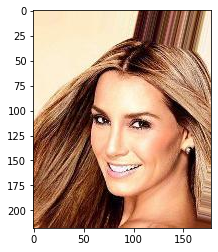

(218, 178, 3) 202599


In [2]:
allImgPath = []
#fullImgPath = "C:/Users/Belg/Downloads/archive(1)/celeba_hq/val/female"
fullImgPath = "C:/Users/Belg/OneDrive - OST\Master's/02_Semester/VA/celeba/img_align_celeba"

for path in os.listdir(fullImgPath):
    if ".jpg" in path:
        allImgPath.append(os.path.join(fullImgPath,path))

image = img.imread(allImgPath[0])
plt.imshow(image)
plt.show()
print(image.shape, len(allImgPath))

In [5]:
fullImgPath = "C:/Users/Belg/OneDrive - OST\Master's/02_Semester/VA/celeba"
train_ds = tf.keras.utils.image_dataset_from_directory(directory=fullImgPath,color_mode="grayscale",validation_split=0.95,subset="training",seed=42,batch_size=16 ,image_size=(1024, 1024),shuffle=True,crop_to_aspect_ratio=True)


Found 202599 files belonging to 1 classes.
Using 10130 files for training.


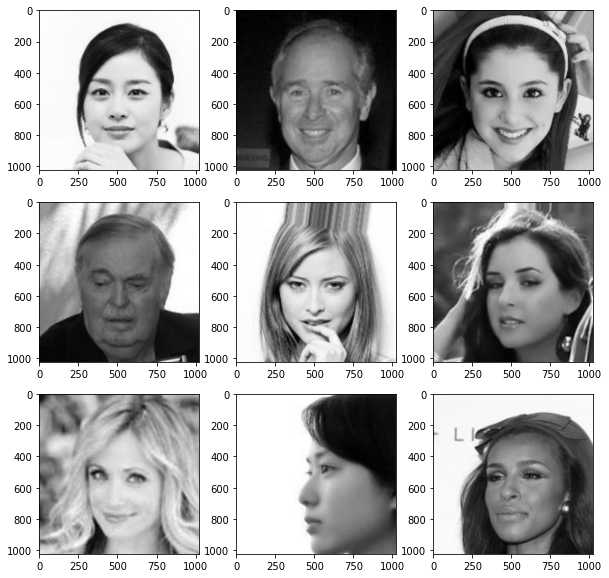

In [6]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"),cmap="gray")


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./127.5,offset=-1)


In [8]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[-1,1]`.
print(np.min(first_image), np.max(first_image))

-1.0 0.9819701


In [14]:

for i,_ in normalized_ds:
    image_batch.

tensorflow.python.framework.ops.EagerTensor

In [82]:
AUTOTUNE = tf.data.AUTOTUNE

trainDataset = image_batch


TypeError: 'MapDataset' object is not subscriptable

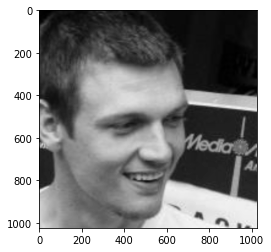

tf.Tensor(
[[[[-0.9843137 ]
   [-0.9843137 ]
   [-0.9843137 ]
   ...
   [-0.88235295]
   [-0.88235295]
   [-0.88235295]]

  [[-0.9843137 ]
   [-0.9843137 ]
   [-0.9843137 ]
   ...
   [-0.88235295]
   [-0.88235295]
   [-0.88235295]]

  [[-0.9843137 ]
   [-0.9843137 ]
   [-0.9843137 ]
   ...
   [-0.88235295]
   [-0.88235295]
   [-0.88235295]]

  ...

  [[ 0.6313727 ]
   [ 0.6313727 ]
   [ 0.6313727 ]
   ...
   [ 0.8509805 ]
   [ 0.8509805 ]
   [ 0.8509805 ]]

  [[ 0.6313727 ]
   [ 0.6313727 ]
   [ 0.6313727 ]
   ...
   [ 0.8509805 ]
   [ 0.8509805 ]
   [ 0.8509805 ]]

  [[ 0.6313727 ]
   [ 0.6313727 ]
   [ 0.6313727 ]
   ...
   [ 0.8509805 ]
   [ 0.8509805 ]
   [ 0.8509805 ]]]


 [[[ 0.082353  ]
   [ 0.082353  ]
   [ 0.082353  ]
   ...
   [ 0.0196079 ]
   [ 0.0196079 ]
   [ 0.0196079 ]]

  [[ 0.082353  ]
   [ 0.082353  ]
   [ 0.082353  ]
   ...
   [ 0.0196079 ]
   [ 0.0196079 ]
   [ 0.0196079 ]]

  [[ 0.082353  ]
   [ 0.082353  ]
   [ 0.082353  ]
   ...
   [ 0.0196079 ]
   [ 0.0196079 ]


In [12]:

plt.imshow(image_batch[0],cmap="gray")
plt.show()
print(image_batch)

In [3]:
x = []
cropping = (0,30,178,208)

j = 0
for i in allImgPath[0:2500]:
    x.append((Image.open(i).convert('L')).crop(cropping).resize((1024,1024)))
    j+=1
    print(j)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [4]:
type(x[0])

PIL.Image.Image

In [4]:
from numpy import savez_compressed

filename = "celebA_1024.npz"
savez_compressed(filename,x)

c:\Users\Belg\Python\venv\lib\site-packages\numpy\lib\npyio.py:719: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  val = np.asanyarray(val)
c:\Users\Belg\Python\venv\lib\site-packages\numpy\lib\npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


KeyboardInterrupt: 

In [32]:
img_to_array(x)

ValueError: Unsupported image shape: (1, 1024, 1024, 1)

In [4]:
from keras.preprocessing.image import img_to_array

j=0
imgArr = []
for i in range(len(x)):
    imgArr.append(np.array(x[i],dtype="float32"))
    j+=1
    print(j)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [39]:
imgArr[0]

array([[237., 237., 237., ..., 242., 242., 242.],
       [237., 237., 237., ..., 242., 242., 242.],
       [237., 237., 237., ..., 242., 242., 242.],
       ...,
       [193., 193., 192., ..., 158., 158., 158.],
       [195., 195., 194., ..., 161., 161., 161.],
       [196., 196., 195., ..., 162., 162., 162.]], dtype=float32)

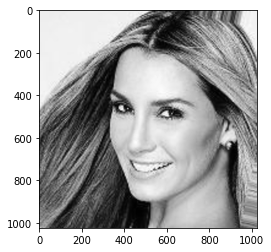

(1024, 1024)


In [5]:
plt.imshow(imgArr[0],cmap="gray")
plt.show()
print(imgArr[0].shape)

In [6]:
for i in range(len(imgArr)):
    imgArr[i] = imgArr[i]/127.5-1.0

In [6]:
type(imgArr[0])

numpy.ndarray

In [9]:
type(imgArr)

list

In [7]:
from numpy import asarray 
imgArr = []
j=0
for i in range(len(x)):
    imgArr.append(np.array(x[i],dtype="float32"))
    j+=1
    print(j)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [11]:
imgArr[0]

array([[[237.],
        [237.],
        [237.],
        ...,
        [242.],
        [242.],
        [242.]],

       [[237.],
        [237.],
        [237.],
        ...,
        [242.],
        [242.],
        [242.]],

       [[237.],
        [237.],
        [237.],
        ...,
        [242.],
        [242.],
        [242.]],

       ...,

       [[193.],
        [193.],
        [192.],
        ...,
        [158.],
        [158.],
        [158.]],

       [[195.],
        [195.],
        [194.],
        ...,
        [161.],
        [161.],
        [161.]],

       [[196.],
        [196.],
        [195.],
        ...,
        [162.],
        [162.],
        [162.]]], dtype=float32)

In [13]:
imgArr.shape

AttributeError: 'list' object has no attribute 'shape'

In [14]:
imgArr[0]

array([[[0.85882354],
        [0.85882354],
        [0.85882354],
        ...,
        [0.8980392 ],
        [0.8980392 ],
        [0.8980392 ]],

       [[0.85882354],
        [0.85882354],
        [0.85882354],
        ...,
        [0.8980392 ],
        [0.8980392 ],
        [0.8980392 ]],

       [[0.85882354],
        [0.85882354],
        [0.85882354],
        ...,
        [0.8980392 ],
        [0.8980392 ],
        [0.8980392 ]],

       ...,

       [[0.5137255 ],
        [0.5137255 ],
        [0.5058824 ],
        ...,
        [0.23921573],
        [0.23921573],
        [0.23921573]],

       [[0.5294118 ],
        [0.5294118 ],
        [0.52156866],
        ...,
        [0.26274514],
        [0.26274514],
        [0.26274514]],

       [[0.5372549 ],
        [0.5372549 ],
        [0.5294118 ],
        ...,
        [0.27058828],
        [0.27058828],
        [0.27058828]]], dtype=float32)

In [7]:
xTrain = imgArr

In [3]:
partImgPath = allImgPath[160001:202599]
cropping = (0,20,178,208)

xTrain = [np.array((Image.open(path).convert('L').crop(cropping)).resize((1024,1024))) for path in partImgPath]

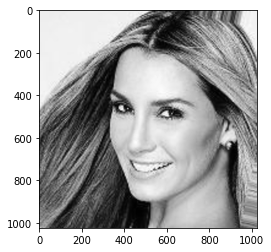

(1024, 1024)


In [14]:
plt.imshow(xTrain[0],cmap="gray")
plt.show()
print(xTrain[0].shape)

In [5]:
for i in range(len(xTrain)):
    xTrain[i] = xTrain[i]/127.5-1 #tanh -->[-1,1]

xTrain = np.array(xTrain)

In [6]:
#xTrain=xTrain[0:50000]
xTrain.shape

(19999, 64, 64)

<Figure size 720x720 with 0 Axes>

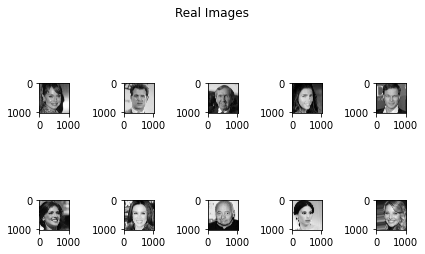

In [8]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots(2,5)
fig.suptitle("Real Images")
idx=8

for i in range(2):
    for j in range(5):
            ax[i,j].imshow(((xTrain[idx])* 0.5 + 0.5).reshape(1024,1024,1),cmap="gray")            
            idx+=6
            
plt.tight_layout()
plt.show()

In [8]:
batchSize = 16
nepochs = 20000
zDim = 256
imgShape = (1024,1024,1)
sampleInterval = 1

In [10]:
with tf.device('/CPU:0'):
    trainDataset = tf.data.Dataset.from_tensor_slices(xTrain).shuffle(len(xTrain)).batch(batchSize)

In [7]:
trainDataset = imgArr


In [29]:
for batch in trainDataset:
    print(batch.shape)
    break

(1024, 1024, 1)


<font style="color:red"><h1>Model Architecture </h1></font>

In [11]:
oldgenerator = K.models.load_model("512_Celeb_a_CNNgenerator")
oldgenerator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4096)              1052672   
                                                                 
 batch_normalization_30 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_3 (Reshape)         (None, 2, 2, 1024)        0         
                                                                 
 conv2d_transpose_27 (Conv2D  (None, 4, 4, 512)        4719104   
 Transpose)                                                      
                                                                 
 batch_normalization_31 (Bat  (None, 4, 4, 512)       

In [12]:
def buildGenerator():

    model = Sequential()
    model.add(Dense(1024 * 2 * 2, input_shape=(zDim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Reshape([2, 2, 1024]))

    model.add(Conv2DTranspose(512, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(256, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(32, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(16, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(8, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(4, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(2, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(BatchNormalization())
    model.add(Conv2DTranspose(1, kernel_size=3, padding='same', activation="tanh"))

    return model

buildGenerator().summary()
generator = buildGenerator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              1052672   
                                                                 
 batch_normalization (BatchN  (None, 4096)             16384     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 2, 2, 1024)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 4, 4, 512)        4719104   
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 512)        2

In [13]:
for i in range((len(oldgenerator.layers)-2)):
    generator.layers[i].set_weights(oldgenerator.layers[i].get_weights())

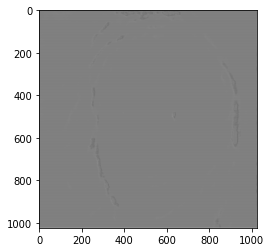

In [14]:
#generate noise image
noise = tf.random.normal([1, zDim])
generatedImage = generator(noise, training=False)

plt.imshow((generatedImage[0])* 0.5 + 0.5,cmap="gray")
plt.show()


In [15]:
olddiscriminator = K.models.load_model("512_Celeb_a_CNNdiscriminator")
olddiscriminator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 256, 256, 1)       10        
                                                                 
 leaky_re_lu_91 (LeakyReLU)  (None, 256, 256, 1)       0         
                                                                 
 dropout_55 (Dropout)        (None, 256, 256, 1)       0         
                                                                 
 conv2d_56 (Conv2D)          (None, 128, 128, 2)       20        
                                                                 
 leaky_re_lu_92 (LeakyReLU)  (None, 128, 128, 2)       0         
                                                                 
 dropout_56 (Dropout)        (None, 128, 128, 2)       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 64, 64, 4)        

In [16]:
def buildDiscriminator():

    model = Sequential()

    model.add(Conv2D(1,kernel_size=3,strides=2,input_shape=imgShape,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(1,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(2,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(4,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(8,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(16,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(32,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(64,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(128,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(256,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(512,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(1024,kernel_size=3,strides=2,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

buildDiscriminator().summary()
discriminator = buildDiscriminator()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 1)       10        
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 512, 512, 1)       0         
                                                                 
 dropout (Dropout)           (None, 512, 512, 1)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 1)       10        
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 256, 256, 1)       0         
                                                                 
 dropout_1 (Dropout)         (None, 256, 256, 1)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 2)      

In [17]:
discriminator = buildDiscriminator()
for i in range(4,len(olddiscriminator.layers)):
    discriminator.layers[i].set_weights(olddiscriminator.layers[i-3].get_weights())

In [18]:
#classyfy with discriminator
decision = discriminator(generatedImage, training = False)
print (decision)

tf.Tensor([[0.8779562]], shape=(1, 1), dtype=float32)


In [19]:
#classyfy with discriminator
x = tf.convert_to_tensor(imgArr[0].reshape(1,1024,1024,1))
decision = discriminator(x, training = False)
print (decision)

tf.Tensor([[0.75563383]], shape=(1, 1), dtype=float32)


<font style="color:red"><h1>Train GAN </h1></font>

In [20]:
def sampleImg(generator,imgGridRow = 4, imgGridColumn = 4):
    noise = tf.random.normal([batchSize, zDim])
    genImg = generator.predict(noise)

    fig, axs = plt.subplots(imgGridRow,imgGridColumn,figsize=(5,5),sharey = True,sharex=True)
    cnt = 0
    for i in range(imgGridRow):
        for j in range(imgGridColumn):
            axs[i,j].imshow(genImg[cnt]* 0.5 + 0.5,cmap="gray")
            axs[i,j].axis("off")
            cnt+=1
    plt.show()

<font style="color:red"><h2>Gradient Tape </h2></font>

In [21]:
crossentropy = BinaryCrossentropy(from_logits=False)

def discriminatorLoss(real, fake):
    realLoss = crossentropy(tf.ones_like(real), real)
    fakeLoss = crossentropy(tf.zeros_like(fake), fake)
    return realLoss + fakeLoss

def generatorLoss(fake):
    return crossentropy(tf.ones_like(fake), fake)
    
generatorOptimiser = tf.keras.optimizers.Adam()
discriminatorOptimiser = tf.keras.optimizers.Adam()

In [22]:
@tf.function
def train_step_GT(images):
    noise = tf.random.normal([batchSize, zDim])

    with tf.GradientTape() as gTape, tf.GradientTape() as dTape:
      genImg = generator(noise, training=True)

      real = discriminator(images, training=True)
      fake = discriminator(genImg, training=True)

      gLoss = generatorLoss(fake)
      dLoss = discriminatorLoss(real, fake)

    gradientsOfGenerator = gTape.gradient(gLoss, generator.trainable_variables)
    gradientsOfDiscriminator = dTape.gradient(dLoss, discriminator.trainable_variables)

    generatorOptimiser.apply_gradients(zip(gradientsOfGenerator, generator.trainable_variables))
    discriminatorOptimiser.apply_gradients(zip(gradientsOfDiscriminator, discriminator.trainable_variables))

    return gLoss,dLoss

In [23]:
def accuracy(batch):
    noise = tf.random.normal([batchSize, zDim])
    genimg = generator(noise, training=False)
    pred = np.round(tf.get_static_value(discriminator(genimg, training=False)),0)
    fake = tf.zeros_like(pred)
    accF = sklearn.metrics.accuracy_score(fake,pred)*100

    noise = tf.random.normal([batchSize, zDim])
    genimg = generator(noise, training=False)
    pred = np.round(tf.get_static_value(discriminator(batch, training=False)),0)
    real = tf.ones_like(pred)
    accR = sklearn.metrics.accuracy_score(real,pred)*100

    return (accF+accR)/2, np.mean(discriminator(genimg, training = False))

In [24]:
def training_GT():
    for epoch in range(nepochs):
      start = time.time()

      for batch in trainDataset:
        train_step_GT(batch)
      genLoss,disLoss = train_step_GT(batch)

      acc, decision = accuracy(batch)
        
      if (epoch + 1) % sampleInterval ==0:
        print ('Time for epoch {} is {} sec'.format(epoch + 1, np.round(time.time()-start)))
        print("Epoch: ",epoch + 1,"| Discriminator Loss: ",np.round(tf.get_static_value(disLoss),2),"| Accuracy: ",np.round(tf.get_static_value(acc),2),"%","| Generator Loss: ",np.round(tf.get_static_value(genLoss),2))
        print("---------------------------------------------------------------------------------------------------------------------------------------------------------------")
        sampleImg(generator)

      if acc <=50 and decision>=0.6:
        break

In [25]:
training_GT()

: 

: 

<font style="color:red"><h1>Save trained Model </h1></font>

In [61]:
generator.compile(loss="binary_crossentropy",optimizer="adam")
generator.save("1024_Celeb_a_CNNgenerator")

generator.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
discriminator.save("1024_Celeb_a_CNNdiscriminator")

INFO:tensorflow:Assets written to: 32_Celeb_a_CNNgenerator\assets
INFO:tensorflow:Assets written to: 32_Celeb_a_CNNdiscriminator\assets


In [62]:
model = K.models.load_model("1024_Celeb_a_CNNgenerator")
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4096)              1052672   
                                                                 
 batch_normalization_18 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_3 (Reshape)         (None, 2, 2, 1024)        0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 4, 4, 512)        4719104   
 Transpose)                                                      
                                                                 
 batch_normalization_19 (Bat  (None, 4, 4, 512)       

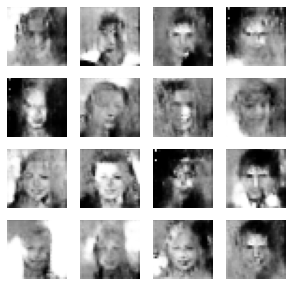

In [63]:
sampleImg(model)

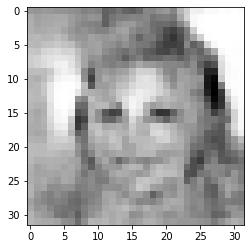

In [71]:
noise = tf.random.normal([256, zDim])
genImg = model.predict(noise)
plt.imshow(genImg[0]* 0.5 + 0.5,cmap="gray")
plt.show()

In [65]:
decision = discriminator(genImg, training = False)
print (np.mean(decision))

0.24451388


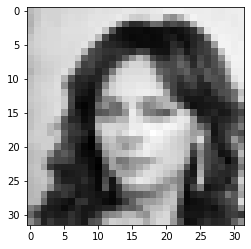

(32, 32)


In [66]:
plt.imshow(xTrain[0],cmap="gray")
plt.show()
print(xTrain[0].shape)